In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [100]:
def combine_data(filepath, total_part, keyword, savepath):
    combined_data = pd.DataFrame()
    path = filepath
    for i in range(total_part):
        file_path = path + keyword + str(i) + ".csv"

        data = pd.read_csv(file_path)

        combined_data = pd.concat([combined_data, data], ignore_index=True)

    combined_data['title'] = combined_data['title'].str.lower()
    combined_data['description'] = combined_data['description'].str.lower()
    combined_data.to_csv(savepath + "combined" + keyword + ".csv", header=True, index=False)


In [188]:
def pre_processing(data, keywords, sort_value=None, ascending=False):
    regex_pattern = '|'.join(keywords)
    filtered_df = data[(data['title'].str.contains(regex_pattern))]
    if sort_value!=None:
        filtered_df = filtered_df.sort_values(sort_value, ascending=ascending)
    filtered_df = filtered_df.drop(filtered_df[filtered_df['rating_view'] == -2].index)
    filtered_df = filtered_df.dropna()
    # print(filtered_df['published_date'])
    filtered_df['published_date'] = filtered_df['published_date'].apply(lambda x: str(x)).apply(lambda x: x[:7])
    # filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'], yearfirst=True)
    # filtered_df['published_date'] = filtered_df['published_date'].dt.date
    return filtered_df

In [193]:
KoreanEnglishman_data = pd.read_csv("/home/lafesta/Desktop/Methodology/dataset/KoreanEnglishman/KoreanEnglishman_data.csv", index_col=0)
KoreanEnglishman_data = pre_processing(KoreanEnglishman_data, sort_value = 'rating_view', keywords=keywords)
KoreanEnglishman_data

,title,rating_view,rating_comments,rating_good,published_date,description
video_id,,,,,,
0Pu--Gf98xY,영국 고등학생들에게 불닭볶음면을 줘봤더니…?ㅎ🔥🥵 얘들아 미안…;;🚽,21510659,23922,477127,2021-08,"7년전, 한국에 있는 여러분들이 저희에게 불닭볶음면이라는 새로운 라면을 보내주셨어요..."
JWZmdWP67DA,런던의 불닭볶음면 도전!! // fire noodle challenge!!,11274985,8995,87173,2014-02,이전 편: http://www.youtube.com/watch?v=i8bqu0nwu...
WpZ3UVY0LFk,영국 축구선수들에게 불닭볶음면을 줘봤더니…? 🔥🥵,7754786,5158,155020,2022-04,오늘은 매운걸 좋아한다는 해쉬태그 f.c 선수들과 불닭볶음면 챌린지를 해봤습니다! ...
b_9SkC1qt_0,런던의🔥핵불닭볶음면🔥도전!!!,7500273,7452,78396,2017-03,이전편: https://youtu.be/vm8k6mivvwe 여러분 드디어 올것이 ...
IyXONGYjqA4,불닭볶음면 도전: 미국편!! // fire noodle challenge: am...,6410519,2902,69674,2015-01,미국 로드트립 편: https://www.youtube.com/watch?v=sz9...
J6QSczwj_4U,한국의 매운맛에 찐 화난 영국 래퍼들!!!🔥 (매운 치즈불닭+소맥+막걸리),4865785,7846,163065,2021-09,지역 상인 여러분 늘 응원합니다! ogam tapas bar 주소: 10 chape...
FfnsQF4EwWo,마블 영웅들의 불닭볶음면 도전?!!,4477301,2664,50101,2016-10,안녕하세요! 이번 주는 특별한 에피소드를 준비 했어요! (다음주에 다시 조엘 시리즈...
POCnB7zJvOQ,cambridge students try korean fire noodles!,3542489,3101,108721,2023-05,today we challenge cambridge university studen...
fcuko6KtjOA,양띵 + 데이브 + 영국남자 불닭볶음면 도전!! // youtubers do f...,3091561,3699,20359,2014-10,이전편: https://www.youtube.com/watch?v=a7tn8mbfw...


In [99]:
def plotting(data, x, y, figsize=(50,5)):
    sns.set(rc={"figure.figsize": figsize})
    ax = sns.lineplot(x=x, y=y, data=data)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

In [189]:
keywords = ['불닭', '불닭 챌린지', 'fire noodle challenge', 'fire noodle', 'korean spicy noodle', '불닭볶음면', '핵붉닭', 'nuclear fire noodle', 'noodle challenge']
keyword_df={}
for keyword in keywords:
    keyword_df[keyword] = pd.read_excel("/home/lafesta/Desktop/Methodology/dataset/spicynoodle/"+keyword+".xlsx")



In [102]:
keyword_df['불닭']

,title,url,rating_view,published_date
0,SUB)매콤꾸덕 두찜 불닭로제찜닭 먹방🔥 (ft. 탱글뽀독 소세지) 후식으로 물냉면...,https://www.youtube.com/watch?v=uAVzZEr3-lk&pp...,146008,2024-05-23
1,"해외에서 1억뷰 기록한 전설의 불닭 영상 ""그리고 아이를 직접 찾아나선 호치""",https://www.youtube.com/watch?v=zXGrDZmtvQ4&pp...,3787,2024-05-23
2,ENG)🍪휴일 아침 크루키 만들고 명랑핫도그 신메뉴와 로제불닭 조합 맛보는 일상. ...,https://www.youtube.com/watch?v=01gOjZrWFAk&pp...,11948,2024-05-24
3,너 몇 년 차야?,https://www.youtube.com/watch?v=zSd-IVhnBJY&pp...,1316245,2024-05-24
4,"하루 동안 불닭만 10,000칼로리 먹기!! 불닭 음식 다 먹어봤다!! 매운맛 대폭...",https://www.youtube.com/watch?v=SYan5RNcRBY&pp...,772137,2023-06-12
...,...,...,...,...
498,오늘 위장 컨디션 미쳤네요👍혼자 소곱창+소대창 20인분에 음료까지 배 터지게 먹었어...,https://www.youtube.com/watch?v=R-Lrb3jrSVo&pp...,15527,2024-05-24
499,보는 맛이 있는 8결투가 이소룡 리신 덱,https://www.youtube.com/watch?v=TZzdv1rYmKg&pp...,6680,2024-05-23
500,[십이지천2M] 연휴 끝 지친 마음을 달래며 썰자나 해봅시다~,https://www.youtube.com/watch?v=s6HAwjLgXcg&pp...,101,2023-12-26
501,외국인들이 좋아하는 아이스크림 맛은 뭘까? (feat.배스킨라빈스),https://www.youtube.com/shorts/8o03uBhDJc4,30937,2024-05-23


In [190]:
processed_keyword_df={}
for keyword in keywords:
    processed_keyword_df[keyword] = pre_processing(keyword_df[keyword], sort_value="rating_view", keywords=keywords, ascending=False)
#print(processed_keyword_df)
total_df = processed_keyword_df['불닭']
for keyword in keywords:
    total_df = pd.concat([total_df,processed_keyword_df[keyword]], axis=0)
total_df = total_df.drop_duplicates(['title'], keep='first', inplace=False, ignore_index=False)

In [196]:
KE_grouped_data

published_date
2014-02    11274985
2014-10     3091561
2015-01     8060854
2016-10     4477301
2017-03     7500273
2017-04     2471765
2018-09     1432507
2021-08    21510659
2021-09     4865785
2022-04     7754786
2023-05     3542489
2023-06      381649
2023-12     2415808
2024-02      237710
Name: rating_view, dtype: int64

In [199]:
KE_grouped_data = KoreanEnglishman_data.groupby('published_date')
KE_grouped_data.head()

,title,rating_view,rating_comments,rating_good,published_date,description
video_id,,,,,,
0Pu--Gf98xY,영국 고등학생들에게 불닭볶음면을 줘봤더니…?ㅎ🔥🥵 얘들아 미안…;;🚽,21510659,23922,477127,2021-08,"7년전, 한국에 있는 여러분들이 저희에게 불닭볶음면이라는 새로운 라면을 보내주셨어요..."
JWZmdWP67DA,런던의 불닭볶음면 도전!! // fire noodle challenge!!,11274985,8995,87173,2014-02,이전 편: http://www.youtube.com/watch?v=i8bqu0nwu...
WpZ3UVY0LFk,영국 축구선수들에게 불닭볶음면을 줘봤더니…? 🔥🥵,7754786,5158,155020,2022-04,오늘은 매운걸 좋아한다는 해쉬태그 f.c 선수들과 불닭볶음면 챌린지를 해봤습니다! ...
b_9SkC1qt_0,런던의🔥핵불닭볶음면🔥도전!!!,7500273,7452,78396,2017-03,이전편: https://youtu.be/vm8k6mivvwe 여러분 드디어 올것이 ...
IyXONGYjqA4,불닭볶음면 도전: 미국편!! // fire noodle challenge: am...,6410519,2902,69674,2015-01,미국 로드트립 편: https://www.youtube.com/watch?v=sz9...
J6QSczwj_4U,한국의 매운맛에 찐 화난 영국 래퍼들!!!🔥 (매운 치즈불닭+소맥+막걸리),4865785,7846,163065,2021-09,지역 상인 여러분 늘 응원합니다! ogam tapas bar 주소: 10 chape...
FfnsQF4EwWo,마블 영웅들의 불닭볶음면 도전?!!,4477301,2664,50101,2016-10,안녕하세요! 이번 주는 특별한 에피소드를 준비 했어요! (다음주에 다시 조엘 시리즈...
POCnB7zJvOQ,cambridge students try korean fire noodles!,3542489,3101,108721,2023-05,today we challenge cambridge university studen...
fcuko6KtjOA,양띵 + 데이브 + 영국남자 불닭볶음면 도전!! // youtubers do f...,3091561,3699,20359,2014-10,이전편: https://www.youtube.com/watch?v=a7tn8mbfw...


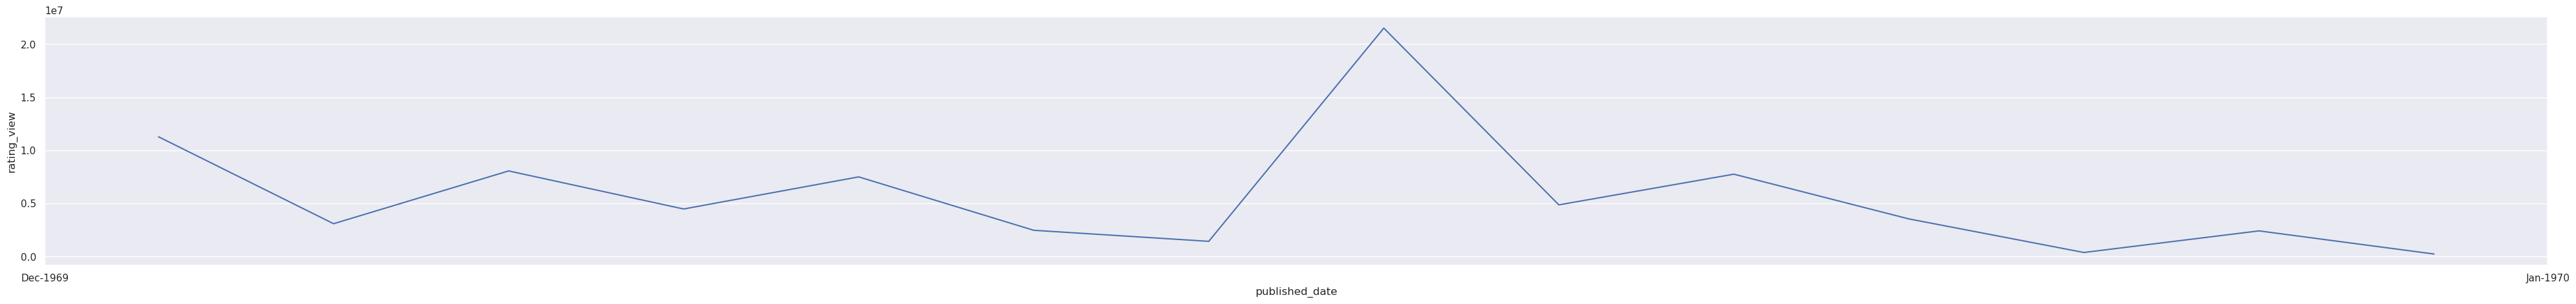

In [195]:
# KoreanEnglishman_data['rating_view'] = KoreanEnglishman_data['rating_view']
# KoreanEnglishman_data['published_date'] = KoreanEnglishman_data['published_date'].apply(lambda x: str(x[:7]))
KE_grouped_data = KoreanEnglishman_data.groupby('published_date')['rating_view'].sum()
sns.set(rc={"figure.figsize": (50,5)})
ax = sns.lineplot(data=KE_grouped_data)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

In [145]:
total_df.head()

,title,url,rating_view,published_date
226,불닭볶음면 먹방 Mukbang Fire Spicy Noodle DONA 도나,https://www.youtube.com/watch?v=85l7vrnkrl0&pp...,635840783,2020-09-03
255,Mukbang Fire Spicy Noodle Tteokbokki 불닭볶음면 떡볶이...,https://www.youtube.com/watch?v=EoMxn7v16ck&pp...,597717506,2022-12-02
159,Mukbang Fire Spicy Noodle 불닭볶음면 먹방 DONA 도나,https://www.youtube.com/watch?v=8w01Rj57BRs&pp...,257434088,2020-02-21
433,ASMR MUKBANG| 편의점 직접 만든 불닭 떡볶이 양념치킨 김밥 디저트 먹방 ...,https://www.youtube.com/watch?v=7o9giuHh1bY&pp...,223593646,2020-08-29
373,ASMR MUKBANG| 직접 만든 불닭볶음면 양념치킨 소세지 먹방 & 레시피 FR...,https://www.youtube.com/watch?v=j4o7F2fmyzc&pp...,222494804,2021-04-09


In [146]:
import numpy as np

# total_df['rating_view'] = total_df['rating_view']

In [152]:
grouped_data = total_df.groupby('published_date')['rating_view'].sum().apply(lambda x: np.log(x))

In [153]:
grouped_data 

published_date
2014-02-09    16.238112
2014-02-13    11.362765
2014-07-09    12.443470
2014-07-14    11.705692
2014-10-02    14.785492
                ...    
2024-05-21    12.684122
2024-05-22    13.282209
2024-05-23    13.256653
2024-05-24    13.047288
2024-05-25     7.170120
Name: rating_view, Length: 1132, dtype: float64

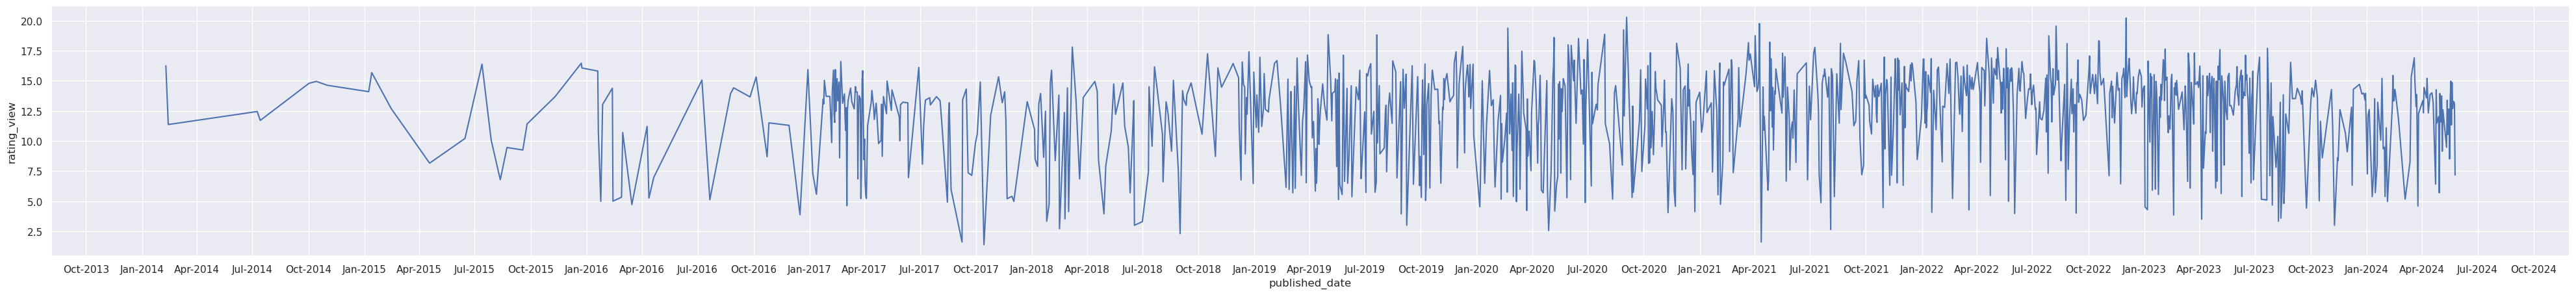

In [154]:
sns.set(rc={"figure.figsize": (50,5)})
ax = sns.lineplot(data=grouped_data)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

In [127]:
plotting(data=grouped_data, x='published_date', y='rating_view')

ValueError: Could not interpret value `rating_view` for parameter `y`

In [96]:
data

,rating_view,published_date,Unnamed: 3
title,,,
British Firefighters try Korean Fire Noodles for the first time!!,https://www.youtube.com/watch?v=79Tt89R6p3k&pp...,2416908,2023-12-20
8 Viral Fire Noodle Recipes,https://www.youtube.com/watch?v=OeV6nyPgqW8&pp...,907698,2024-03-09
Most Korean Fire Noodles Ever Eaten (x15 Packs) | 불닭 볶음면 도전,https://www.youtube.com/watch?v=-sjI6xECTYo&pp...,146589969,2019-07-21
Cambridge Students try Korean Fire Noodles!,https://www.youtube.com/watch?v=POCnB7zJvOQ&pp...,3543035,2023-05-03
6 Viral Fire Noodles Recipes,https://www.youtube.com/watch?v=i0SWjCOlG-8&pp...,2710964,2023-10-05
...,...,...,...
🤯Most Spicy Korean Noodles Challenge Gone Wrong 🥵 Mini Super Market Shopping Bindass Kavya,https://www.youtube.com/watch?v=_xSKlVpH3TQ&pp...,1345436,2024-05-17
FINALLY FATHER FACE REVEAL🫣||sapariwar mela ghumna jada yesto vayo😣,https://www.youtube.com/watch?v=wAo71yjxgJ8&pp...,12509,2024-05-22
Mukbang Fire Spicy Noodle Tteokbokki 불닭볶음면 떡볶이 TV 속 편의점 음식 먹방 #7,https://www.youtube.com/watch?v=Sxz6MaVMn6A&pp...,21890,2024-05-24


In [221]:
news = pd.read_csv('/home/lafesta/Desktop/Methodology/dataset/news/news.csv', index_col=0)
news.head()

,link,title,snippet,date,source
0,https://ca.style.yahoo.com/samyang-limited-edi...,Limited Edition Korean Samyang Carbo Fire Nood...,The dream combination we all have been waiting...,2 days ago,Yahoo Lifestyle Canada
1,https://www.latimes.com/world-nation/story/202...,How some very spicy noodles saved the company ...,"But for Samyang Foods, the family-owned manufa...","Mar 5, 2024",Los Angeles Times
2,https://www.koreatimes.co.kr/www/tech/2024/05/...,"Frozen gimbap, Buldak spicy noodles honored at...","Frozen gimbap and Buldak spicy noodles, which ...",2 days ago,Korea Times
3,https://www.komu.com/news/midmissourinews/fire...,Fire closes Ninth Street Noodles & Company loc...,Noodles and Company on Ninth Street in Columbi...,"Mar 18, 2024",KOMU 8
4,https://www.prnewswire.com/news-releases/hot--...,HOT & SPICY FIRE WOK LAUNCHES NEW LINE OF CHIL...,"Both new flavors, Torched Teriyaki Chicken and...","Dec 6, 2023",PR Newswire


In [214]:
news.size
['2 days ago', 'Mar 5, 2024', '2 hours ago']

2930

In [232]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
def convert_date(date_str):
# 'ago' 제거
    date_str = date_str.split(' ago')[0]
    # 상대적인 날짜로 변환
    if 'days' in date_str or 'day' in date_str:
        delta = relativedelta(days=int(date_str.split()[0]))
        # 현재 날짜에서 뺀 후 결과 반환
        return (datetime.now() - delta).strftime('%b-%Y')
    elif 'hours' in date_str or 'hour' in date_str:
        delta = relativedelta(hours=int(date_str.split()[0]))
        # 현재 날짜에서 뺀 후 결과 반환
        return (datetime.now() - delta).strftime('%b-%Y')
    elif 'week' in date_str or 'weeks' in date_str:
        delta = relativedelta(hours=int(date_str.split()[0]))
    elif 'month' in date_str or 'months' in date_str:
        delta = relativedelta(hours=int(date_str.split()[0]))
    else:
        # '-'로 구분된 형식의 문자열은 그대로 반환
        if '-' in date_str:
            return date_str
        # 'Mar 5, 2024'와 같은 형식의 문자열을 날짜로 파싱한 후 원하는 형식으로 변환
        else:
            date = datetime.strptime(date_str, '%b %d, %Y')
            return date.strftime('%b-%Y')


# 데이터 프레임의 각 행에 대해 날짜 변환 적용
news['date'] = news['date'].apply(convert_date)

print(news['date'])

0      May-2024
1      Mar-2024
2      May-2024
3      Mar-2024
4      Dec-2023
         ...   
581    Jan-2020
582    Jun-2015
583    Feb-2018
584    May-2015
585    Aug-2016
Name: date, Length: 586, dtype: object


In [233]:
news.head()

,link,title,snippet,date,source
0,https://ca.style.yahoo.com/samyang-limited-edi...,Limited Edition Korean Samyang Carbo Fire Nood...,The dream combination we all have been waiting...,May-2024,Yahoo Lifestyle Canada
1,https://www.latimes.com/world-nation/story/202...,How some very spicy noodles saved the company ...,"But for Samyang Foods, the family-owned manufa...",Mar-2024,Los Angeles Times
2,https://www.koreatimes.co.kr/www/tech/2024/05/...,"Frozen gimbap, Buldak spicy noodles honored at...","Frozen gimbap and Buldak spicy noodles, which ...",May-2024,Korea Times
3,https://www.komu.com/news/midmissourinews/fire...,Fire closes Ninth Street Noodles & Company loc...,Noodles and Company on Ninth Street in Columbi...,Mar-2024,KOMU 8
4,https://www.prnewswire.com/news-releases/hot--...,HOT & SPICY FIRE WOK LAUNCHES NEW LINE OF CHIL...,"Both new flavors, Torched Teriyaki Chicken and...",Dec-2023,PR Newswire


In [242]:
grouped_news = news.groupby('date').count()

In [244]:
grouped_news.describe

<bound method NDFrame.describe of           link  title  snippet  source
date                                  
Apr-2015     1      1        1       1
Apr-2017     2      2        2       2
Apr-2019     4      4        4       4
Apr-2021     9      9        9       9
Apr-2022     4      4        4       4
...        ...    ...      ...     ...
Sep-2019    13     13       13      13
Sep-2020     7      7        7       7
Sep-2021     1      1        1       1
Sep-2022     4      4        4       4
Sep-2023    13     13       13      13

[109 rows x 4 columns]>

Text(0, 0.5, 'count')

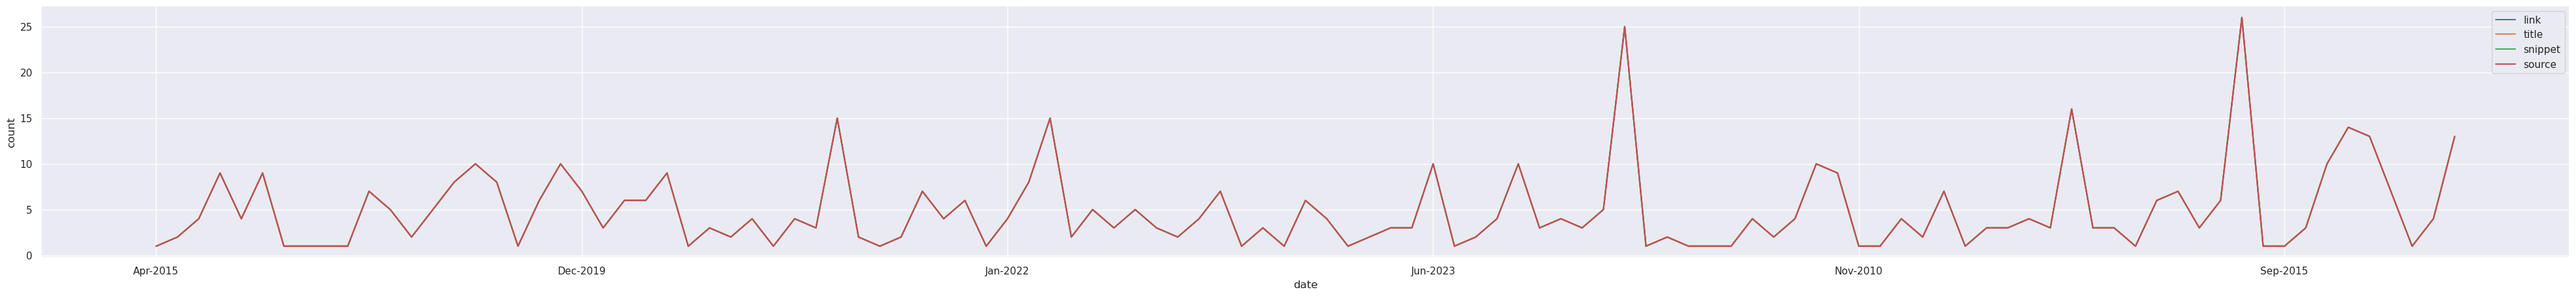

In [254]:
# x_ticks = list(grouped_news.keys())
y_lim = [grouped_news.min()*0.5, grouped_news.max()*1.2]

ax1=grouped_news.plot(kind='line', figsize=[50,5])
ax1.set_xlabel('date')
ax1.set_ylabel('count')

In [256]:
list(grouped_news.keys())

['link', 'title', 'snippet', 'source']